# ***Brain Tumor Classification 🧠***

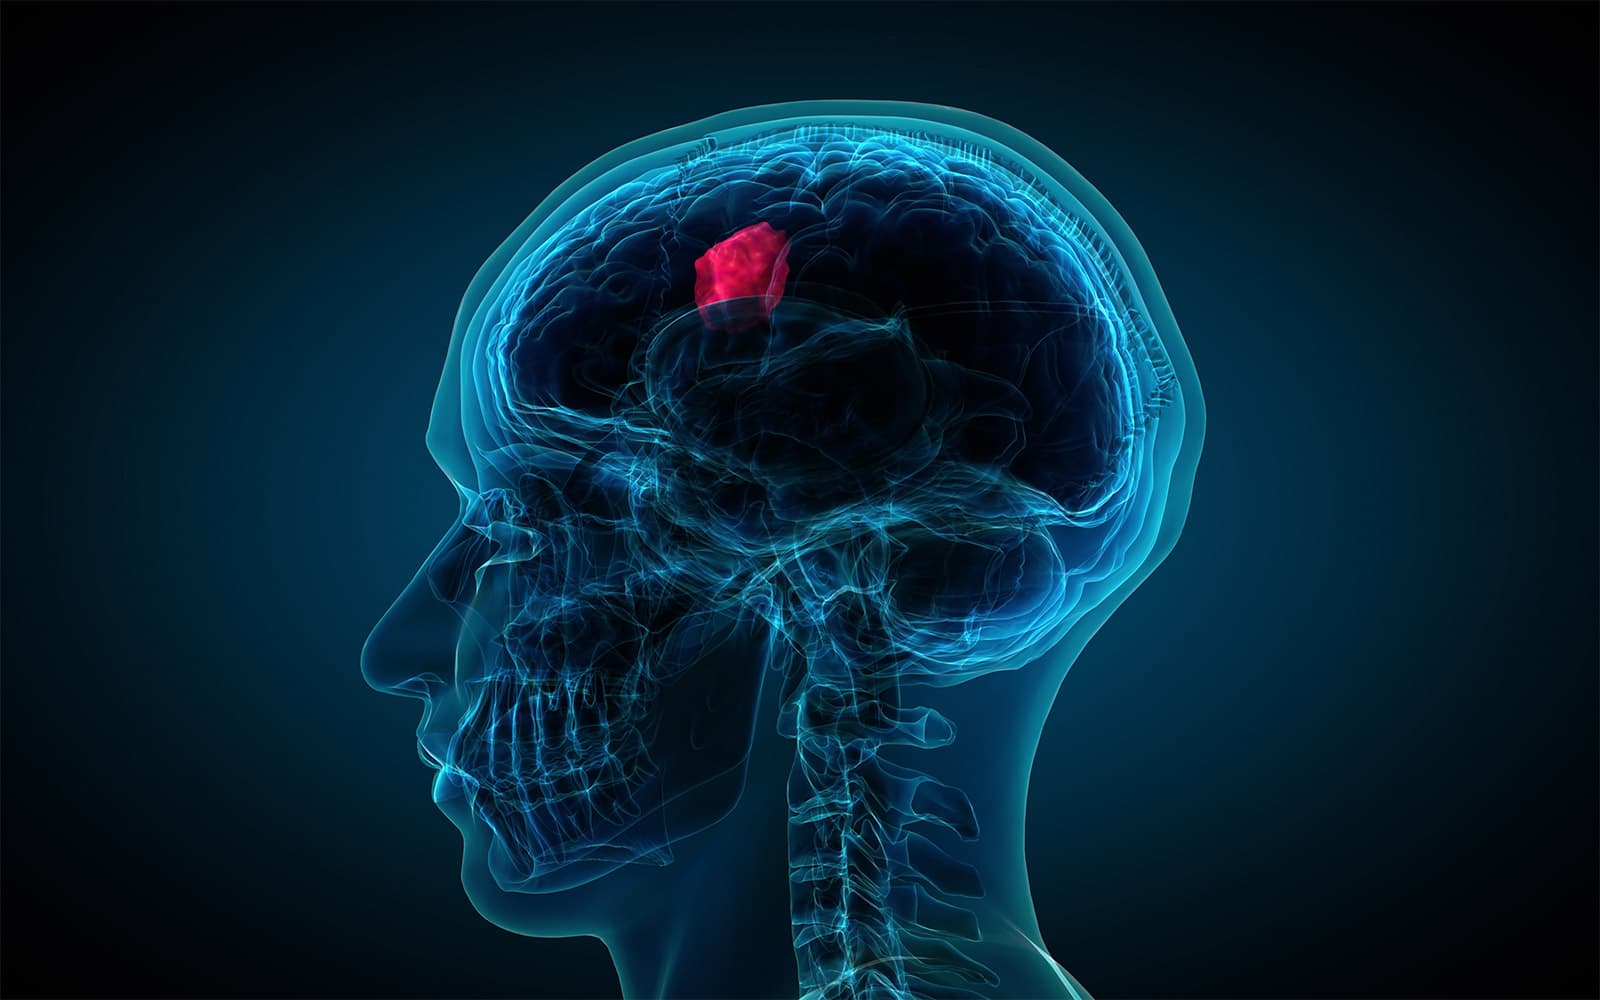

# ***About The Data :***

### ***What is a brain tumor?***

A brain tumor is a collection, or mass, of abnormal cells in your brain. Your skull, which encloses your brain, is very rigid. Any growth inside such a restricted space can cause problems. Brain tumors can be cancerous (malignant) or noncancerous (benign). When benign or malignant tumors grow, they can cause the pressure inside your skull to increase. This can cause brain damage, and it can be life-threatening.

### ***The importance of the subject***

Early detection and classification of brain tumors is an important research domain in the field of medical imaging and accordingly helps in selecting the most convenient treatment method to save patients life therefore

### ***About the Dataset***

This dataset is a compilation of three primary datasets: figshare, Br35H, and a removed source due to bad data.

The dataset comprises a total of 7023 human brain MRI images, categorized into four distinct classes. The dataset focuses on brain tumors and their
## classification. The four classes are as follows:
### Glioma: Cancerous brain tumors in glial cells.
### Meningioma: Non-cancerous tumors originating from the meninges.
### No Tumor: Normal brain scans without detectable tumors.
###Pituitary: Tumors affecting the pituitary gland, which can be cancerous or non-cancerous.

# ***Importing Libraries***

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Flatten, Dense, Dropout, Activation , Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications import VGG16
from tensorflow import keras
from tensorflow.keras import mixed_precision


import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

print("Mixed Precision Enabled:", policy)

Mixed Precision Enabled: <DTypePolicy "mixed_float16">


In [ ]:
print("GPU Available:", len(tf.config.list_physical_devices('GPU')) > 0)

GPU Available: True


# ***Importing Data and Preperation***




In [ ]:
data_dir = "/content/drive/MyDrive/brain_tumor_data"
train_datasets = os.path.join(data_dir, "Training")
validation_datasets = os.path.join(data_dir, "Testing")

In [ ]:
categories = os.listdir(train_datasets)
print("Categories:", categories)

Categories: ['glioma', 'meningioma', 'notumor', 'pituitary']


In [ ]:
batch_size = 64
image_size = 224

In [ ]:
def prepare_the_datasets(train_datasets, validation_datasets, batch_size, image_size):

    train_datasets_generator = ImageDataGenerator(rescale=1.0/255,
                                                  brightness_range=(0.8, 1.2))



    validation_datasets_generator = ImageDataGenerator(rescale=1.0/255)


    train_datasets_generator_data = train_datasets_generator.flow_from_directory(
        batch_size = batch_size,
        directory = train_datasets,
        shuffle = True,
        target_size = (image_size, image_size),
        class_mode = "categorical"
    )

    validation_datasets_generator_data = validation_datasets_generator.flow_from_directory(
        batch_size = batch_size,
        directory = validation_datasets,
        shuffle = True,
        target_size = (image_size, image_size),
        class_mode = "categorical"
    )


    return train_datasets_generator_data, validation_datasets_generator_data

In [ ]:
train_data , validation_data = prepare_the_datasets(train_datasets, validation_datasets, batch_size, image_size)

Found 5654 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


# ***Data Visualization (EDA)***

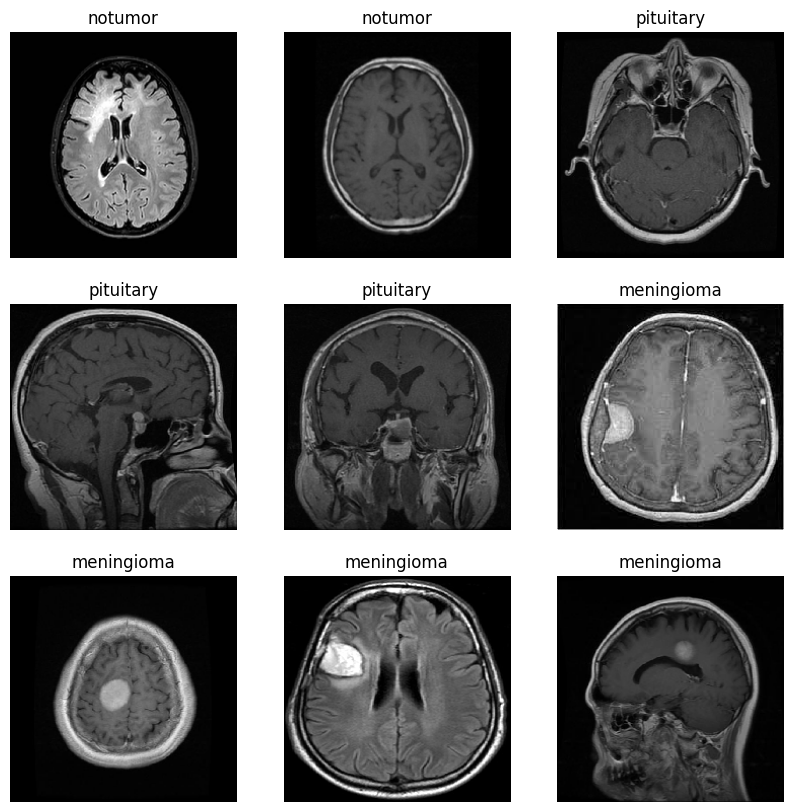

In [ ]:
images, labels = next(train_data)

class_labels = list(train_data.class_indices.keys())

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.axis('off')

    class_index = np.argmax(labels[i])
    plt.title(class_labels[class_index])

plt.show()

# ***Model ARCHITECTURE***

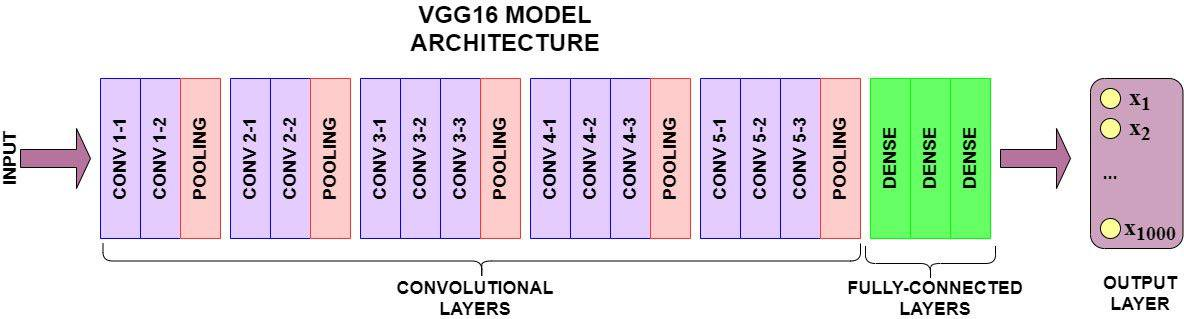

In [ ]:
base_model = VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

for layer in base_model.layers:
    layer.trainable = False

for layer in base_model.layers:
    if layer.name.startswith('block5'):
        layer.trainable = True

inputs = Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = Flatten()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(4, activation='softmax')(x)

model1 = Model(inputs, outputs)

model1.compile(optimizer=Adam(learning_rate=0.0001),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

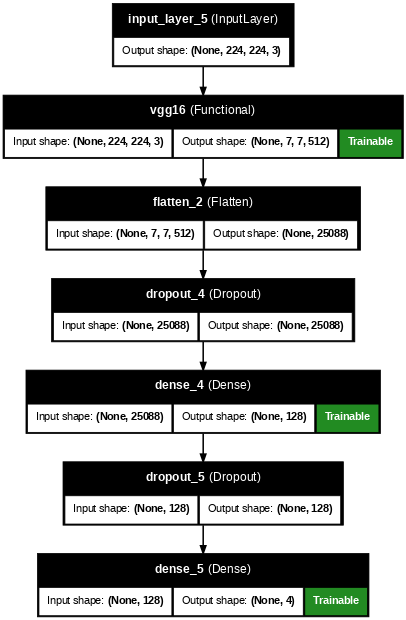

In [ ]:
plot_model(
    model1,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    dpi=55,
    show_layer_activations=False,
    show_trainable=True
)

# ***Train model***

In [ ]:
steps = int(train_data.samples / batch_size)
epochs = 10

# Train the model
history = model1.fit(train_data, validation_data = validation_data ,
                    epochs=epochs, steps_per_epoch=steps)

Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 43s 488ms/step - accuracy: 0.9890 - loss: 0.0337 - val_accuracy: 0.9657 - val_loss: 0.0877
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - accuracy: 1.0000 - loss: 0.0046 - val_accuracy: 0.9695 - val_loss: 0.0833
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 44s 498ms/step - accuracy: 0.9939 - loss: 0.0188 - val_accuracy: 0.9703 - val_loss: 0.0863
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.9545 - loss: 0.0720 - val_accuracy: 0.9840 - val_loss: 0.0476
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 42s 483ms/step - accuracy: 0.9937 - loss: 0.0186 - val_accuracy: 0.9786 - val_loss: 0.0650
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.9794 - val_loss: 0.0631
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 74s 470ms/step - accuracy: 0.9960 - loss: 0.0147 - val_accuracy: 0.9741 - val_loss: 0.0782
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 1.0000 - loss: 4.1669e-04 - val_accuracy

In [ ]:
model1.save('model1.keras')

In [ ]:
model1.save('model1.h5')